## Instalações e Imports

In [2]:
!pip install scikit-fuzzy
!pip install scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from scipy import signal


## SCI
Desenvolva aqui o código do seu Sistema de Controle Inteligente Fuzzy.
Lembre-se de que o nome do Control System Simulation deve ser "motorcc".

In [9]:
# Criar variáveis fuzzy
velocidade_angular = ctrl.Antecedent(np.arange(150, 250, 1), 'Velocidade Angular')
torque = ctrl.Antecedent(np.arange(0, 51, 1), 'Torque da Carga')  # Ajuste o intervalo do torque
tensao = ctrl.Consequent(np.arange(0, 301, 1), 'Tensão')

# Funções de pertinência para Velocidade Angular
velocidade_angular['muito_baixa'] = fuzz.trimf(velocidade_angular.universe, [150, 150, 170])
velocidade_angular['baixa'] = fuzz.trimf(velocidade_angular.universe, [150, 170, 180])
velocidade_angular['ideal'] = fuzz.trimf(velocidade_angular.universe, [180, 190, 200])
velocidade_angular['alta'] = fuzz.trimf(velocidade_angular.universe, [190, 210, 230])
velocidade_angular['muito_alta'] = fuzz.trimf(velocidade_angular.universe, [220, 250, 250])

# Funções de pertinência para Torque da Carga
torque['muito_baixo'] = fuzz.trimf(torque.universe, [0, 0, 10])
torque['baixo'] = fuzz.trimf(torque.universe, [5, 10, 20])
torque['medio'] = fuzz.trimf(torque.universe, [15, 25, 35])
torque['alto'] = fuzz.trimf(torque.universe, [30, 40, 50])
torque['muito_alto'] = fuzz.trimf(torque.universe, [40, 50, 50])

# Funções de pertinência para Tensão (ajustado para o intervalo 200-300)
tensao['muito_baixa'] = fuzz.trimf(tensao.universe, [200, 200, 220])
tensao['baixa'] = fuzz.trimf(tensao.universe, [210, 220, 240])
tensao['media'] = fuzz.trimf(tensao.universe, [230, 250, 270])
tensao['alta'] = fuzz.trimf(tensao.universe, [260, 280, 300])
tensao['muito_alta'] = fuzz.trimf(tensao.universe, [280, 300, 300])


# Regras fuzzy ajustadas
regra1 = ctrl.Rule(velocidade_angular['muito_baixa'] & torque['muito_baixo'], tensao['muito_alta'])
regra2 = ctrl.Rule(velocidade_angular['muito_baixa'] & torque['baixo'], tensao['alta'])
regra3 = ctrl.Rule(velocidade_angular['muito_baixa'] & torque['medio'], tensao['alta'])
regra4 = ctrl.Rule(velocidade_angular['muito_baixa'] & torque['alto'], tensao['alta'])
regra5 = ctrl.Rule(velocidade_angular['muito_baixa'] & torque['muito_alto'], tensao['alta'])
regra6 = ctrl.Rule(velocidade_angular['baixa'] & torque['muito_baixo'], tensao['alta'])
regra7 = ctrl.Rule(velocidade_angular['baixa'] & torque['baixo'], tensao['media'])
regra8 = ctrl.Rule(velocidade_angular['baixa'] & torque['medio'], tensao['media'])
regra9 = ctrl.Rule(velocidade_angular['baixa'] & torque['alto'], tensao['media'])
regra10 = ctrl.Rule(velocidade_angular['baixa'] & torque['muito_alto'], tensao['alta'])
regra11 = ctrl.Rule(velocidade_angular['ideal'] & torque['muito_baixo'], tensao['baixa'])
regra12 = ctrl.Rule(velocidade_angular['ideal'] & torque['baixo'], tensao['baixa'])
regra13 = ctrl.Rule(velocidade_angular['ideal'] & torque['medio'], tensao['baixa'])
regra14 = ctrl.Rule(velocidade_angular['ideal'] & torque['alto'], tensao['baixa'])
regra15 = ctrl.Rule(velocidade_angular['ideal'] & torque['muito_alto'], tensao['baixa'])
regra16 = ctrl.Rule(velocidade_angular['alta'] & torque['muito_baixo'], tensao['muito_baixa'])
regra17 = ctrl.Rule(velocidade_angular['alta'] & torque['baixo'], tensao['muito_baixa'])
regra18 = ctrl.Rule(velocidade_angular['alta'] & torque['medio'], tensao['muito_baixa'])
regra19 = ctrl.Rule(velocidade_angular['alta'] & torque['alto'], tensao['muito_baixa'])
regra20 = ctrl.Rule(velocidade_angular['alta'] & torque['muito_alto'], tensao['muito_baixa'])
regra21 = ctrl.Rule(velocidade_angular['muito_alta'] & torque['muito_baixo'], tensao['muito_baixa'])
regra22 = ctrl.Rule(velocidade_angular['muito_alta'] & torque['baixo'], tensao['muito_baixa'])
regra23 = ctrl.Rule(velocidade_angular['muito_alta'] & torque['medio'], tensao['muito_baixa'])
regra24 = ctrl.Rule(velocidade_angular['muito_alta'] & torque['alto'], tensao['muito_baixa'])
regra25 = ctrl.Rule(velocidade_angular['muito_alta'] & torque['muito_alto'], tensao['muito_baixa'])



# Criar o sistema de controle fuzzy
motorcc_ctrl = ctrl.ControlSystem([
    regra1, regra2, regra3, regra4, regra5,
    regra6, regra7, regra8, regra9, regra10,
    regra11, regra12, regra13, regra14, regra15,
    regra16, regra17, regra18, regra19, regra20,
    regra21, regra22, regra23, regra24, regra25
])
motorcc = ctrl.ControlSystemSimulation(motorcc_ctrl)



In [ ]:
# Lembre-se de que o nome do Control System Simulation deve ser "motorcc": motorcc = ctrl.ControlSystemSimulation(motorcc_ctrl)

## Inferência
A entrada deve ser uma simulação de controle com o nome "motorcc"

In [5]:
# Constantes do motor

pi = math.pi

Pn = 7457 # Potência nominal (W)
Vn = 240  # Tensão nominal de armadura (V)
Vfn = 300 # Tensão nominal de campo (V)
wn = 1750 * 2 * pi / 60 # velocidade angular nominal (rad/s)
Tn = Pn / wn # Torque nominal (Nm)

Ra = 1.086    # Resistência do armadura (Ohms)
La = 0.01216  # Indutância do armadura (H)
Rf = 180
Lf = 71.47
Laf = 0.6458 # Este é o Kv da simulação matlab
J = 0.04251   # Inércia do rotor (kg.m^2)
B = 0.003406    # Coeficiente de atrito viscoso (Nms)
Tf = 1.046

If = Vfn / Rf
Ke = Laf*If
Kt = Ke


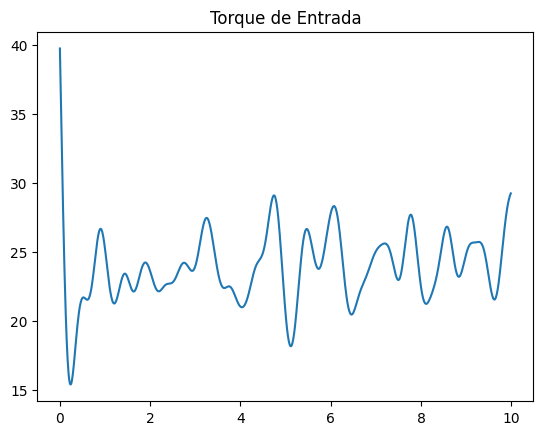

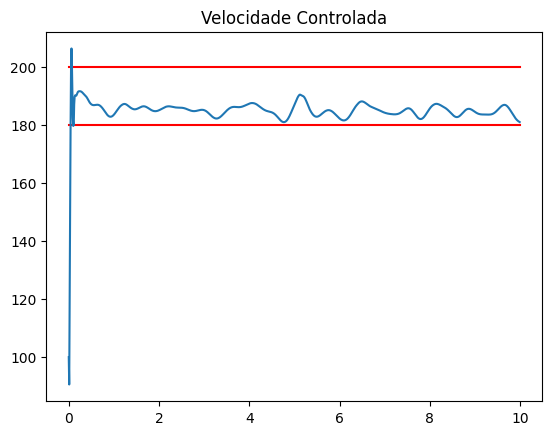

In [10]:
# Parâmetros de simulação
dt = 1e-2  # Passo de tempo (s)
t_sim = 10

# Inicialização
t = np.arange(0, t_sim, dt)
i = np.zeros_like(t)
w = np.zeros_like(t)

max = np.ones_like(t) * 200
min = np.ones_like(t) * 180

# Condições iniciais
i[0] = 0
w[0] = 100

# Gerar ruído aleatório
ruido = np.random.rand(len(t))

# Criar um filtro passa-baixa Butterworth
fc = 2  # Frequência de corte (ajuste para controlar a suavidade)
ordem = 4  # Ordem do filtro (ajuste para controlar a suavidade)
b, a = signal.butter(ordem, fc * dt * 2, 'lowpass')

T_minimo = 0.1 * Tn  # Valor mínimo de torque
T_suave = signal.filtfilt(b, a, ruido) * Tn + T_minimo

# Plotar o ruído original e o ruído suavizado
plt.title('Torque de Entrada')
plt.plot(t, T_suave)
plt.show()

# Loop de simulação
for k in range(len(t) - 1):
    T = T_suave[k]

    motorcc.input['Velocidade Angular'] = w[k]
    motorcc.input['Torque da Carga'] = T
    motorcc.compute()


    V = motorcc.output['Tensão']

    # Calcular a corrente e a velocidade no próximo passo de tempo
    i[k+1] = i[k] + dt * (V - Ra*i[k] - Ke*w[k]) / La
    w[k+1] = w[k] + dt * (Kt*i[k] - T - B*w[k]) / J


# Plotar os resultados
plt.title('Velocidade Controlada')
plt.plot(t, max, color = 'red', )
plt.plot(t, min, color = 'red')
plt.plot(t, w)
plt.show()